In [14]:
import os
import re
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt


In [15]:
tests_path = 'tests/'
files = os.listdir(tests_path)
files


['node-1-workers.csv',
 'node-10-workers.csv',
 'node-12-workers.csv',
 'node-2-workers.csv',
 'node-4-workers.csv',
 'node-6-workers.csv',
 'node-8-workers.csv']

In [16]:
df = pd.DataFrame()
for file in files: 
  numWorkes = re.search(r'node-(\d+)-workers.csv', file)
  temp = pd.read_csv(tests_path + file, index_col=0)
  temp['created_at'] = pd.to_datetime(temp['created_at'])
  temp['workers'] = numWorkes.group(1)
  temp['workers'] = temp['workers'].astype(int)

  df = pd.concat([df, temp])

df['language'] = 'node'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700000 entries, 1 to 99999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   nome        700000 non-null  object        
 1   descricao   700000 non-null  object        
 2   valores     700000 non-null  object        
 3   created_at  700000 non-null  datetime64[ns]
 4   workers     700000 non-null  int32         
 5   language    700000 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 34.7+ MB


In [18]:
df.head()

,nome,descricao,valores,created_at,workers,language
id,,,,,,
1,User 6,Descrição do usuário 6,"{150,168,140,157}",2023-10-26 23:14:09.463171,1,node
5,User 3,Descrição do usuário 3,"{129,156,132,132}",2023-10-26 23:14:09.462434,1,node
11,User 11,Descrição do usuário 11,"{164,132,160,127}",2023-10-26 23:14:09.513173,1,node
13,User 13,Descrição do usuário 13,"{143,111,165,145}",2023-10-26 23:14:09.516732,1,node
21,User 21,Descrição do usuário 21,"{192,192,155,115}",2023-10-26 23:14:09.523548,1,node


In [19]:
df.to_csv('node-workers.csv')

In [20]:
df['workers'].value_counts()

1     100000
10    100000
12    100000
2     100000
4     100000
6     100000
8     100000
Name: workers, dtype: int64

In [21]:
df['created_at'].min()

Timestamp('2023-10-26 23:14:09.460962')

In [22]:
normalized_time_df = df.copy()

In [23]:
for worker in df['workers'].unique():
  difference = df[df['workers'] == 1]['created_at'].min(
  ) - df[df['workers'] == worker]['created_at'].min()
  normalized_time_df.loc[normalized_time_df['workers'] == worker,
                       'created_at'] = normalized_time_df[normalized_time_df['workers'] == worker]['created_at'] + difference


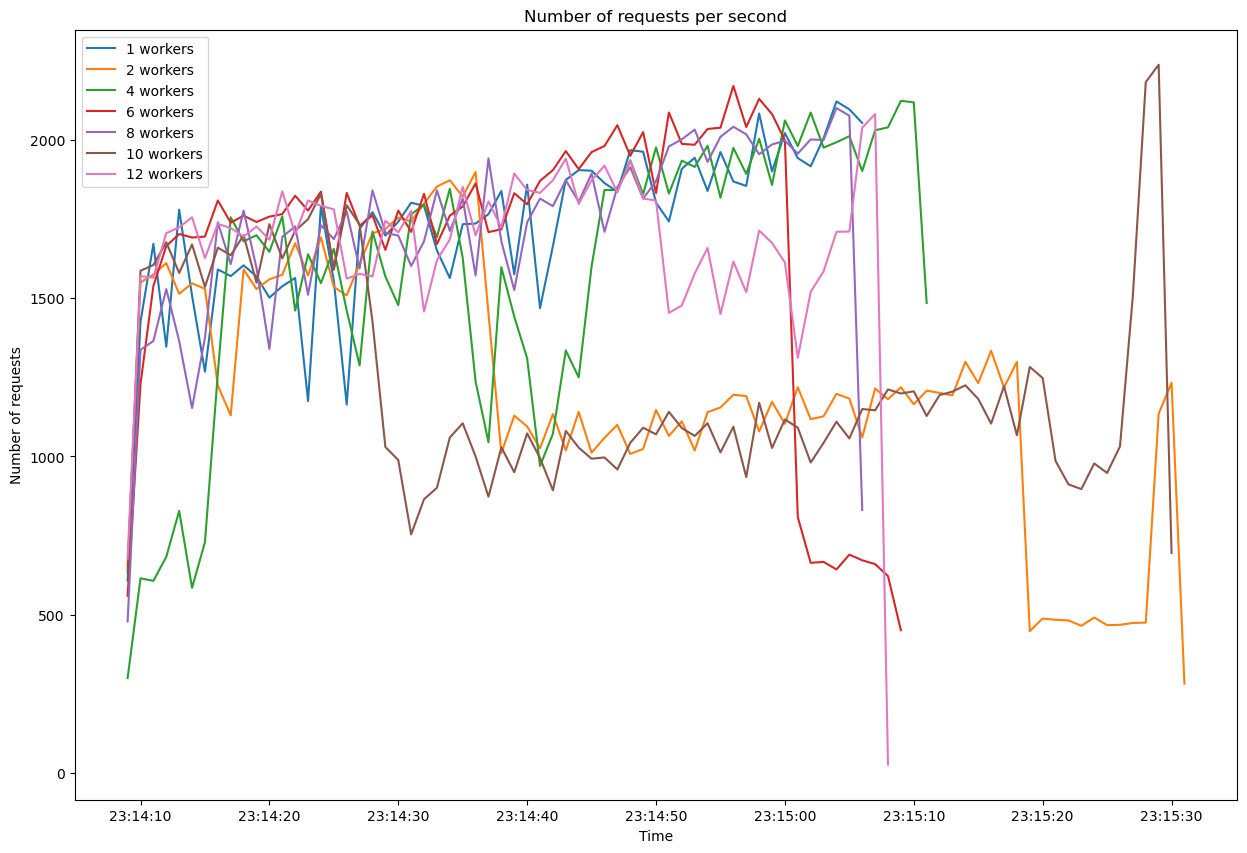

In [24]:
fig = plt.figure(figsize=(15, 10))
for worker in np.sort(normalized_time_df['workers'].unique()):
  temp = normalized_time_df[normalized_time_df['workers'] == worker]
  temp.index = temp['created_at']
  temp = temp.resample('1s').size()
  plt.plot(temp, label=f'{worker} workers')

plt.title('Number of requests per second')
plt.xlabel('Time')
plt.ylabel('Number of requests')
plt.legend()
plt.show()


In [25]:
boxdf = df.copy()

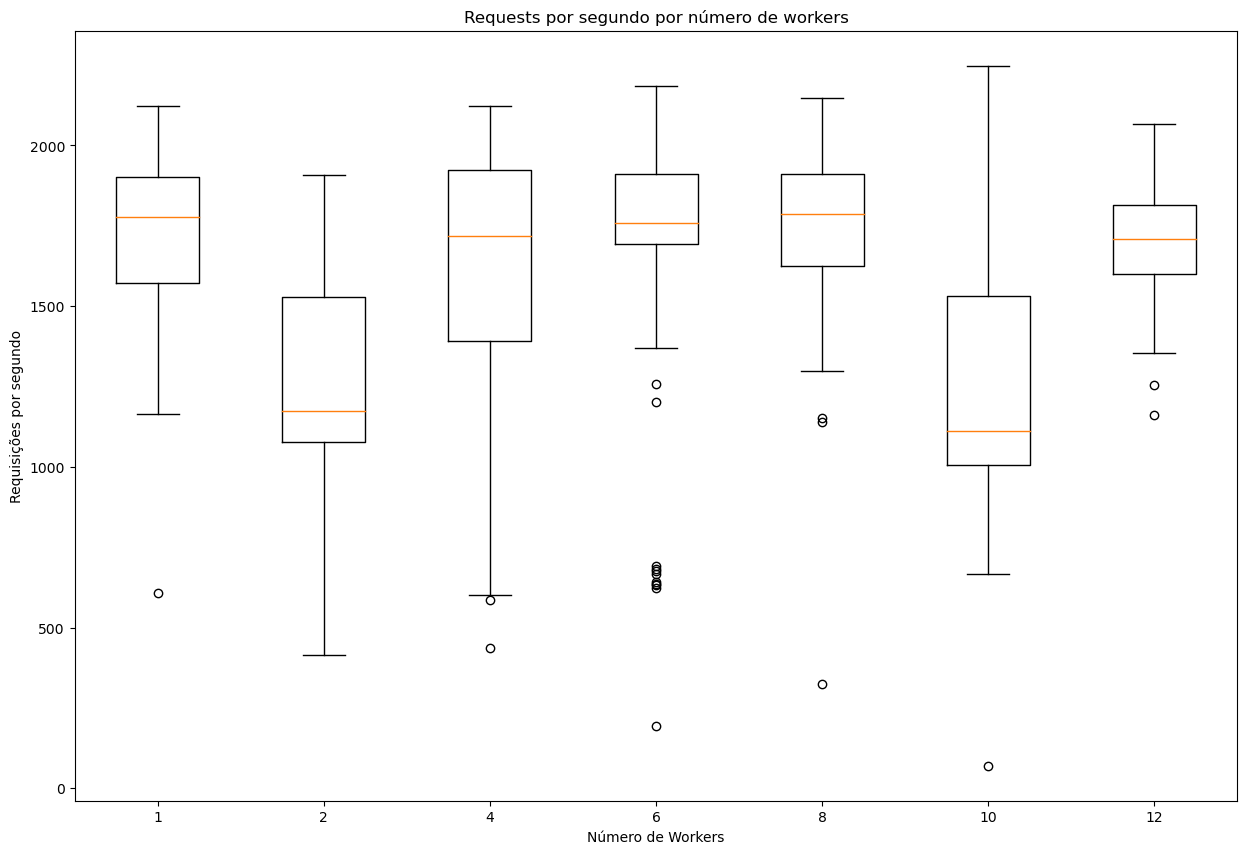

In [29]:
fig, ax = plt.subplots(figsize=(15, 10))
data = []

for worker in np.sort(boxdf['workers'].unique()):
    temp = boxdf[boxdf['workers'] == worker]
    temp.index = temp['created_at']
    temp = temp.resample('1s').size()
    data.append(temp)

ax.boxplot(data, labels=np.sort(boxdf['workers'].unique()))

ax.set_xticklabels(np.sort(boxdf['workers'].unique()))
ax.set_xlabel('Número de Workers')
ax.set_ylabel('Requisições por segundo')
ax.set_title('Requests por segundo por número de workers')

plt.show()
